In [1]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_color_value,
    reconstruct_image_from_general,
    plot_full,
    find_nearest_edge,
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    get_width_info,
    get_width_info_new,
)
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    find_node_equ,
)
import pandas as pd
from amftrack.pipeline.functions.spore_processing.spore_id import make_spore_data
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
    Edge,
    Hyphae,
    get_distance,
)
from amftrack.util.sys import (
    get_analysis_folders,
    get_time_plate_info_from_analysis,
    get_time_hypha_info_from_analysis,
    get_global_hypha_info_from_analysis,
)

from datetime import datetime
from matplotlib import cm
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from IPython.display import clear_output
from amftrack.pipeline.functions.post_processing.exp_plot import *
import pickle

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2023-06-09 10:03:54.458124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 10:03:55.115307: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/home2/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/cv2/../../lib64:
2023-06-09 10:03:55.115379: I tensorflow/stream_executor/cuda/cudart_stub.cc:29

In [2]:
def get_time(exp, t, tp1):  # redefined here to avoid loop in import
    seconds = (exp.dates[tp1] - exp.dates[t]).total_seconds()
    return seconds / 3600

In [28]:
# directory_targ = os.path.join(directory_scratch, "stitch_temp2") + "/"
directory_targ = directory_project

update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)
folders = all_folders.loc[all_folders['unique_id']=='94_20201123']
folders = folders.loc[folders["/Analysis/nx_graph_pruned_labeled.p"] == True]


analysed:   0%|          | 0/3670 [00:00<?, ?it/s]

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp,unique_id,datetime
34,/projects/0/einf914/data/20201124_1202_Plate39,94,39,'Carrot','A5','001P100N','Y',NaN,'20201123',NaN,...,False,True,True,True,True,"24.11.2020, 12:02:",20201124_1202_Plate39,'25',94_20201123,2020-11-24 12:02:00
59,/projects/0/einf914/data/20201126_2009_Plate39,94,39,'Carrot','A5','001P100N','Y',NaN,'20201123',NaN,...,False,True,True,True,True,"26.11.2020, 20:09:",20201126_2009_Plate39,'25',94_20201123,2020-11-26 20:09:00
76,/projects/0/einf914/data/20201202_0609_Plate39,94,39,'Carrot','A5','001P100N','Y',NaN,'20201123',NaN,...,False,True,True,True,True,"02.12.2020, 06:09:",20201202_0609_Plate39,'25',94_20201123,2020-12-02 06:09:00
102,/projects/0/einf914/data/20201126_0402_Plate39,94,39,'Carrot','A5','001P100N','Y',NaN,'20201123',NaN,...,False,True,True,True,True,"26.11.2020, 04:02:",20201126_0402_Plate39,'25',94_20201123,2020-11-26 04:02:00
104,/projects/0/einf914/data/20201203_1405_Plate39,94,39,'Carrot','A5','001P100N','Y',NaN,'20201123',NaN,...,False,True,True,True,True,"03.12.2020, 14:05:",20201203_1405_Plate39,'25',94_20201123,2020-12-03 14:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,/projects/0/einf914/data/20201126_0002_Plate39,94,39,'Carrot','A5','001P100N','Y',NaN,'20201123',NaN,...,False,True,True,True,True,"26.11.2020, 00:02:",20201126_0002_Plate39,'25',94_20201123,2020-11-26 00:02:00
3227,/projects/0/einf914/data/20201127_0909_Plate39,94,39,'Carrot','A5','001P100N','Y',NaN,'20201123',NaN,...,False,True,True,True,True,"27.11.2020, 09:09:",20201127_0909_Plate39,'25',94_20201123,2020-11-27 09:09:00
3257,/projects/0/einf914/data/20201124_0601_Plate39,94,39,'Carrot','A5','001P100N','Y',NaN,'20201123',NaN,...,False,True,True,True,True,"24.11.2020, 06:01:",20201124_0601_Plate39,'25',94_20201123,2020-11-24 06:01:00
3376,/projects/0/einf914/data/20201124_1902_Plate39,94,39,'Carrot','A5','001P100N','Y',NaN,'20201123',NaN,...,False,True,True,True,True,"24.11.2020, 19:02:",20201124_1902_Plate39,'25',94_20201123,2020-11-24 19:02:00


In [34]:
folders = folders.sort_values(by="datetime")

exp = Experiment(directory_targ)
i = 45
exp.load(folders.iloc[i:i+1],suffix="_labeled")
for t in range(exp.ts):
    exp.load_tile_information(t)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2020-11-25 10:02:00


In [3]:
plates = ["94_20201123"]
directory_targ = directory_project
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
# update_plate_info(directory_targ, local=True)
# all_folders = get_current_folders(directory_targ, local=True)

In [25]:
path_exp = f'{directory_targ}{analysis_folders["path_exp"].iloc[0]}'
exp = pickle.load(open(path_exp, "rb"))
exp.save_location = "/"
try:
    exp.labeled
except AttributeError:
    exp.labeled = True
load_graphs(exp, directory_targ, indexes=range(60, 61))

load_study_zone(exp)
for t in range(exp.ts):
    exp.load_tile_information(t)

KeyboardInterrupt: 

In [35]:
t = 0
nodes = get_all_nodes(exp, t)
nodes = [node for node in nodes if node.degree(t)>0]

In [46]:
high_degree_nodes = [node for node in nodes if node.degree(t)==4]

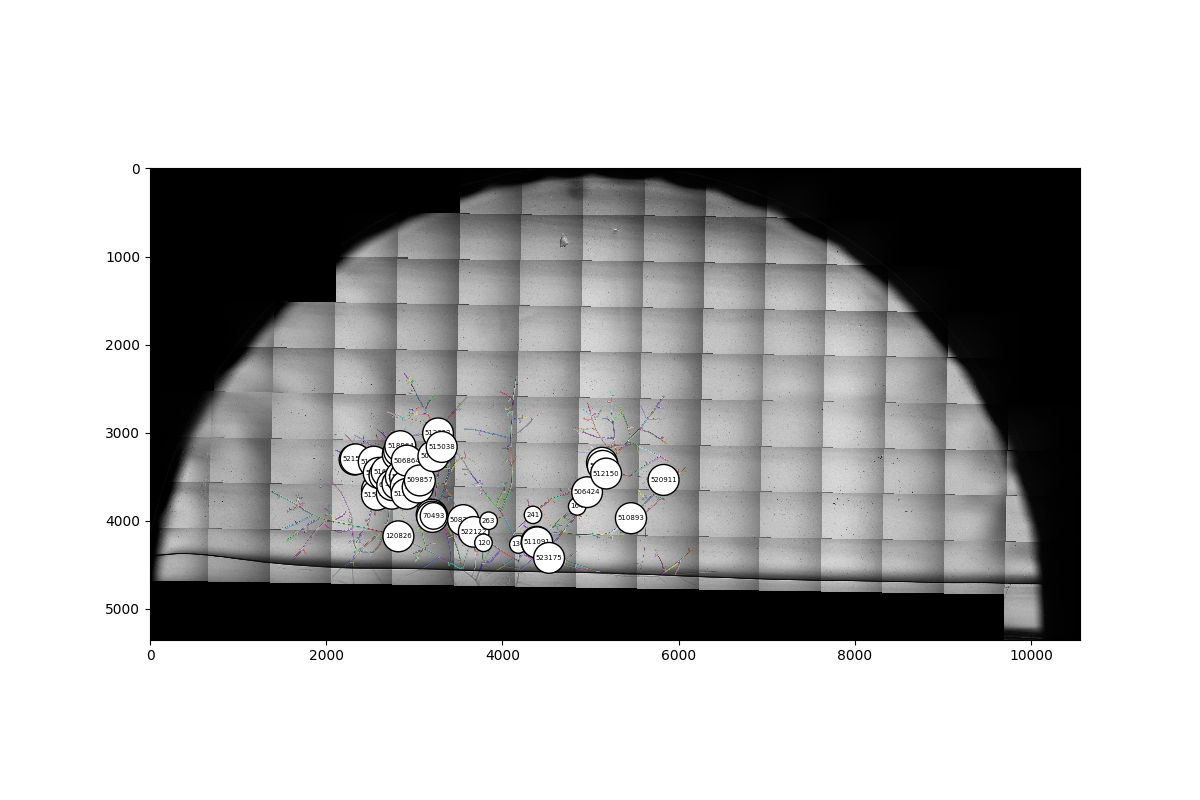

In [49]:
plt.close("all")
exp.load_tile_information(t)
edges = get_all_edges(exp,t)
ax = plot_full_image_with_features(
    exp,
    t,
    nodes = crossing_nodes,
    edges=edges,
    # nodes = tip_disappear,
    dilation=10,
)

In [38]:
articulation_points = list(nx.articulation_points(exp.nx_graph[t]))


In [9]:
edges = get_all_edges(exp,t)

In [39]:
weights = {(edge.begin.label, edge.end.label): edge.length_um(t) for edge in edges}
nx.set_edge_attributes(exp.nx_graph[t], weights, "length")

In [42]:
def compute_ratio(G, pos, node1, node2):
    # Calculate the shortest path length
    shortest_path_length = nx.shortest_path_length(G, node1, node2, weight='length')

    # Calculate the Euclidean distance between node positions
    node1_pos = pos[node1]
    node2_pos = pos[node2]
    distance = np.sqrt((node1_pos[0] - node2_pos[0]) ** 2 + (node1_pos[1] - node2_pos[1]) ** 2)*1.725

    # Compute the ratio
    ratio = distance / shortest_path_length

    return ratio

def compute_global_efficiency(G, pos):
    total_ratio = 0
    count = 0
    all_pairs = nx.all_pairs_dijkstra_path_length(G, weight='length')
    # Iterate over all pairs of nodes
    for node1,distances in all_pairs:
        for node2 in distances.keys():
            if node1 != node2:
                node1_pos = pos[node1]
                node2_pos = pos[node2]
                shortest_path_length = distances[node2]
                distance = np.sqrt((node1_pos[0] - node2_pos[0]) ** 2 + (node1_pos[1] - node2_pos[1]) ** 2)*1.725

                    # Compute the ratio
                ratio = distance / shortest_path_length
                # Accumulate the ratio and increment the count
                total_ratio += ratio
                count += 1
            if count%1e6==0:
                print(count)
    # Compute the average ratio
        # break
    average_ratio = total_ratio / count

    return average_ratio

def get_crossingness(node,t):
    pairs = []
    can_be_removed = True

    for edge in node.edges(t):
        mini = np.inf
        for edge_candidate in node.edges(t):
            angle = np.cos(
                (
                    edge.orientation_begin(t, 100)
                    - edge_candidate.orientation_begin(t, 100)
                )
                / 360
                * 2
                * np.pi
            )
            if angle < mini:
                winner = edge_candidate
                mini = angle
        if (edge, winner) not in pairs and (
            winner,
            edge,
        ) not in pairs:
            pairs.append((edge, winner,mini))
    crossingness = np.min([-pair[2] for pair in pairs])
    pairs = [(pair[0],pair[1]) for pair in pairs]
    symetric = np.all([(pair[1],pair[0]) in pairs for pair in pairs])
    return(crossingness,symetric)

def treat_node(G,node):
    pairs = []
    
    for edge in node.edges(t):
        mini = np.inf
        for edge_candidate in node.edges(t):
            angle = np.cos(
                (
                    edge.orientation_begin(t, 100)
                    - edge_candidate.orientation_begin(t, 100)
                )
                / 360
                * 2
                * np.pi
            )
            if angle < mini:
                winner = edge_candidate
                mini = angle
        if (edge, winner) not in pairs and (
            winner,
            edge,
        ) not in pairs:
            pairs.append((edge, winner))
    can_be_removed = True
    # for pair in pairs:
    #     can_be_removed *= (
    #         pair[0].end.degree(t) != 1 or pair[1].end.degree(t) != 1
    #     )
    #     can_be_removed *= (
    #         pair[0].end.label not in articulation_points
    #         or pair[1].end.label not in articulation_points
    #     )
    if can_be_removed:
        for pair in pairs:
            right_n = pair[0].end
            left_n = pair[1].end
            right_edge = pair[0].pixel_list(t)
            left_edge = list(reversed(pair[1].pixel_list(t)))
            right_edge_width = pair[0].width(t)
            left_edge_width = pair[1].width(t)
            right_edge_length = pair[0].length_um(t)
            left_edge_length= pair[1].length_um(t)
            pixel_list = left_edge + right_edge[1:]
            info = {
                "weight": len(pixel_list),
                "pixel_list": pixel_list,
                "width": (
                    (len(right_edge) * right_edge_width)
                    + (len(left_edge) * left_edge_width)
                )
                / (left_edge_width + right_edge_width),
                "length" : right_edge_length + left_edge_length
            }
            if right_n != left_n:
                G.add_edges_from(
                    [(left_n.label, right_n.label, info)]
                )

        G.remove_node(node.label)

In [43]:
crossingnesses = [get_crossingness(node,t)[0] for node in high_degree_nodes]
symetrics = [get_crossingness(node,t)[1] for node in high_degree_nodes]

In [48]:
crossing_nodes = [node for node in high_degree_nodes if get_crossingness(node,t)[1] and get_crossingness(node,t)[0]>=0.85]
crossing_nodes_label = [node.label for node in crossing_nodes]

In [51]:
G = exp.nx_graph[t]
components = nx.connected_components(G)

# Find the largest connected component
largest_component = max(components, key=len)

# Create a new graph representing the largest connected component
largest_component_graph = G.subgraph(largest_component)
largest_component_graph_no_cross = largest_component_graph.copy()
for node in crossing_nodes:
    if node.label in largest_component_graph_no_cross:
        treat_node(largest_component_graph_no_cross,node)


In [24]:
largest_component

{0,
 1,
 532481,
 532480,
 532484,
 5,
 6,
 540678,
 8,
 540679,
 4,
 16,
 524306,
 524307,
 507922,
 19,
 540695,
 524311,
 25,
 27,
 30,
 34,
 38,
 540711,
 44,
 45,
 47,
 540720,
 540721,
 50,
 49,
 524341,
 54,
 58,
 60,
 61,
 62,
 63,
 65,
 67,
 524356,
 70,
 72,
 73,
 74,
 76,
 79,
 524369,
 516178,
 82,
 85,
 89,
 540761,
 540763,
 92,
 91,
 93,
 90,
 96,
 524381,
 102,
 540774,
 104,
 105,
 532587,
 107,
 109,
 508014,
 111,
 508015,
 524399,
 114,
 540779,
 118,
 120,
 516217,
 123,
 532604,
 124,
 126,
 127,
 128,
 129,
 508034,
 131,
 132,
 133,
 130,
 134,
 136,
 137,
 138,
 516235,
 140,
 516237,
 145,
 147,
 524437,
 540821,
 154,
 156,
 157,
 158,
 159,
 160,
 164,
 165,
 166,
 516263,
 508071,
 170,
 171,
 172,
 173,
 516269,
 174,
 176,
 175,
 178,
 524462,
 180,
 181,
 182,
 516279,
 524472,
 185,
 186,
 532667,
 516284,
 189,
 188,
 191,
 187,
 193,
 194,
 192,
 190,
 197,
 524483,
 199,
 516293,
 516290,
 202,
 203,
 207,
 508112,
 209,
 516305,
 516306,
 212,
 213,

In [54]:
exp.nx_graph[t] = largest_component_graph_no_cross
# exp.nx_graph[t] = largest_component_graph

In [53]:
compute_global_efficiency(largest_component_graph, exp.positions[t])

0
1000000


0.7271861738787984

In [56]:
compute_global_efficiency(largest_component_graph_no_cross, exp.positions[t])

0
1000000


0.7153112982853916